In [36]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
import numpy as np
import sklearn.cluster
import distance

df1 = pd.read_csv('account_holders (joust_production)2.csv')
df1.head()
# Read from file

,Number of Records,Ach Gateway Id,Add Attempt Create Merchant,Address,Alloy Entity Token,Alloy Evaluation Token,Alloy Tags,Apartment Number,Archived,Business Address,...,Remember Created At,Reset Password Sent At,Reset Password Token,Segment Intercom Id,Sign In Count,Ssn,State,Type Of Work,Updated At,Zip
0,1,1.0,False,3780 Newport Way Dr,NaN,NaN,{},NaN,False,NaN,...,NaN,NaN,NaN,4edc33e1-6c6b-4577-8ed4-97fa7c18ccd9,2,tok_live_uAMLnDvXeghNYeZtgdevSW,MI,Martial arts Instruction And Consulting,4/8/2019 3:51:51 AM,48329.0
1,1,1.0,False,394 Vernon St,NaN,NaN,{},NaN,False,NaN,...,NaN,NaN,NaN,454866a6-cb3b-478a-8341-2ff1e1ca5294,1,tok_live_2k8ssduJHF8Kkc4npX1ZRq,CA,Web Developer,4/8/2019 3:41:29 AM,94610.0
2,1,1.0,False,107 Valley St,NaN,NaN,{},NaN,False,NaN,...,NaN,NaN,NaN,94855b3a-69a6-4061-9689-cd3b2878de40,2,tok_live_nejGGUu3WS4rVzteiYnXk5,NH,Travel Agent,4/8/2019 3:51:51 AM,3246.0
3,1,1.0,False,414 Varnum St NW Unit 2,NaN,NaN,{},NaN,False,NaN,...,NaN,NaN,NaN,9f49315d-13b5-4599-894a-8f919648e2fb,6,tok_live_f7mhrELRLCcCNPjLK5cAky,DC,Communications consulting,4/8/2019 3:51:51 AM,20011.0
4,1,1.0,False,2585 55th Ave,NaN,NaN,{},NaN,False,NaN,...,NaN,NaN,NaN,4fa119ac-5b6f-44d8-8dad-ef80ff0b4161,14,tok_live_2CjgKYab3mmdmsNGGki3Fi,CO,Booze Empire,4/8/2019 3:51:51 AM,80634.0


In [37]:
def plot_embedding(X, y, title=None, num=10):
    x_min = np.min(X, 0)
    x_max = np.max(X, 0)
    X = (X-x_min)/(x_max-x_min)
    
    plt.figure(figsize=(18, 9))
    plt.scatter(X[:,0], X[:,1], color=plt.cm.Set1(y/num))
    
    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title)
    plt.show()

## Grouping

In [38]:
import spacy
nlp = spacy.load('en_core_web_md')

In [39]:
print(len(df1['Type Of Work']))
print(len(df1['Type Of Work'].dropna().unique()))

2881
1203


In [40]:
words = df1['Type Of Work'].dropna().unique() 
spacy_similarity = np.array([(nlp(word).vector) for word in words])
#spacy_similarity = np.array([[np.linalg.norm((nlp(w1).vector)-(nlp(w2).vector)) for w1 in words] for w2 in words])
spacy_similarity.shape

(1203, 300)

In [41]:
from sklearn.manifold import TSNE
subSpace = TSNE().fit_transform(spacy_similarity)

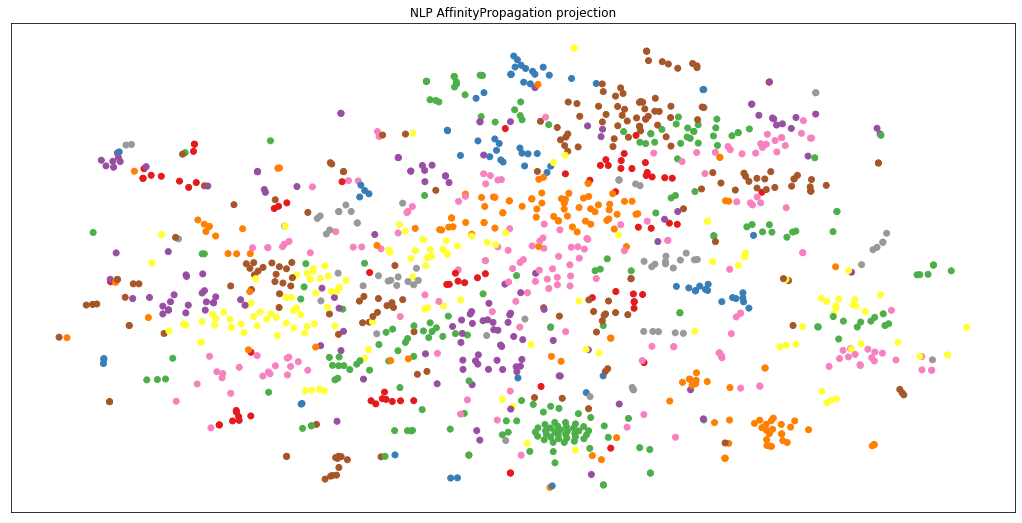

In [42]:
affprop = sklearn.cluster.AffinityPropagation(convergence_iter=15, damping=0.9).fit(spacy_similarity)
plot_embedding(subSpace, affprop.labels_, 'NLP AffinityPropagation projection',130)

In [26]:
df3 = pd.DataFrame(words, columns=['Jobs'])
df3['labels'] = affprop.labels_
df3.head()

,Jobs,labels
0,Live Sound,14
1,Digital Marketing,9
2,Event Planner,20
3,General Labor,20
4,Consulting,22


In [27]:
df3 = df3.sort_values(by=['labels'])
print(df3.labels.max())
df3.head()

26


,Jobs,labels
143,Fashion,0
145,Cosmetics,0
138,Hair AND Beauty Salon,0
7,Fashion Stylist,0
112,Clothing,0


In [30]:
amounts = []
jobs = df3['Jobs'].values
for job in jobs:
    amounts.append(len(df1[df1['Job'] == job]))
df3['Amounts'] = amounts
df3.sort_values(by=['Amounts'], ascending=False).head(15)
#labels = label number
# Amounts = # of people in that job

,Jobs,labels,Amounts
4,Consulting,22,16
14,Retail,6,5
42,Director,7,4
84,Web Design,15,4
44,Construction,15,3
101,Freelance,17,3
69,Photography,18,3
156,Graphic Design,18,2
50,Digital,9,2
158,Software,22,2


In [31]:
job = []
labels = []
amounts = []
for k in range(df3.labels.max()):
    df4 = df3[df3['labels'] == k]
    job.append(min(df4['Jobs'].values, key=len))
    labels.append(len(df4))
    amounts.append(df4['Amounts'].sum())
df5 = pd.DataFrame(job, columns=['Jobs'])
df5['size'] = labels
df5['density'] = amounts
df5.sort_values(by=['density'], ascending=False).head(15)

,Jobs,size,density
20,It,41,43
14,Driving,36,38
18,books,23,26
17,Branding,18,21
22,Software,4,20
15,Design,14,19
3,Dental,9,9
6,Retail,4,8
9,Digital,5,6
8,Media,6,6


## Cutoff Determination

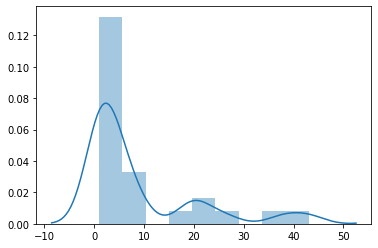

In [32]:
import seaborn as sns
df6 = df5.sort_values(by=['density'], ascending=False)
sns.distplot(df6.density.values)

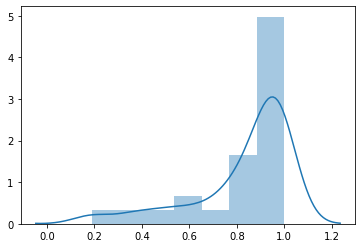

In [33]:
df6['total'] = df6.density.expanding(1).sum()
df6['percent'] = df6['total']/(df6['density'].sum())
sns.distplot(df6.percent.values)

In [34]:
df6.head(20)

,Jobs,size,density,total,percent
20,It,41,43,43.0,0.188596
14,Driving,36,38,81.0,0.355263
18,books,23,26,107.0,0.469298
17,Branding,18,21,128.0,0.561404
22,Software,4,20,148.0,0.649123
15,Design,14,19,167.0,0.732456
3,Dental,9,9,176.0,0.771930
6,Retail,4,8,184.0,0.807018
9,Digital,5,6,190.0,0.833333
8,Media,6,6,196.0,0.859649


In [ ]:
# Size = Nuber of unique elements in cluster
# Density = Number of people in cluster